Available columns in session 1: ['Experiment', 'v1_mean', 'v2_mean', 'a_mean_s1', 'ndt_mean_s1', 'alpha_mean', 'accuracy_percentage', 'mean_log_rt', 'RT_mean_correct_error', 'mean_correct', 'mean_Crror', 'error_array', 'RT_Cor_arr', 'q1_C', 'q2_C', 'q3_C', 'q4_C', 'q1_E', 'q2_E', 'q3_E', 'q4_E', 'participant_ID', 'alpha_mean_shifted', 'alpha_mean_arcsin', 'alpha_boxcox_after_arcsin_s1', 'accuracy_percentage_arcsin', 'accuracy_percentage_boxcox_after_arcsin']
Available columns in session 2: ['Experiment', 'v1_mean', 'v2_mean', 'a_mean_s2', 'ndt_mean_s2', 'alpha_mean', 'accuracy_percentage', 'mean_log_rt', 'RT_mean_correct_error', 'mean_correct', 'mean_Crror', 'error_array', 'RT_Cor_arr', 'q1_C', 'q2_C', 'q3_C', 'q4_C', 'q1_E', 'q2_E', 'q3_E', 'q4_E', 'participant_ID', 'alpha_mean_shifted', 'alpha_mean_arcsin', 'alpha_boxcox_after_arcsin_s2', 'accuracy_percentage_arcsin', 'accuracy_percentage_boxcox_after_arcsin']
Using identifier column: participant_ID

Diagnostic Information for Condit

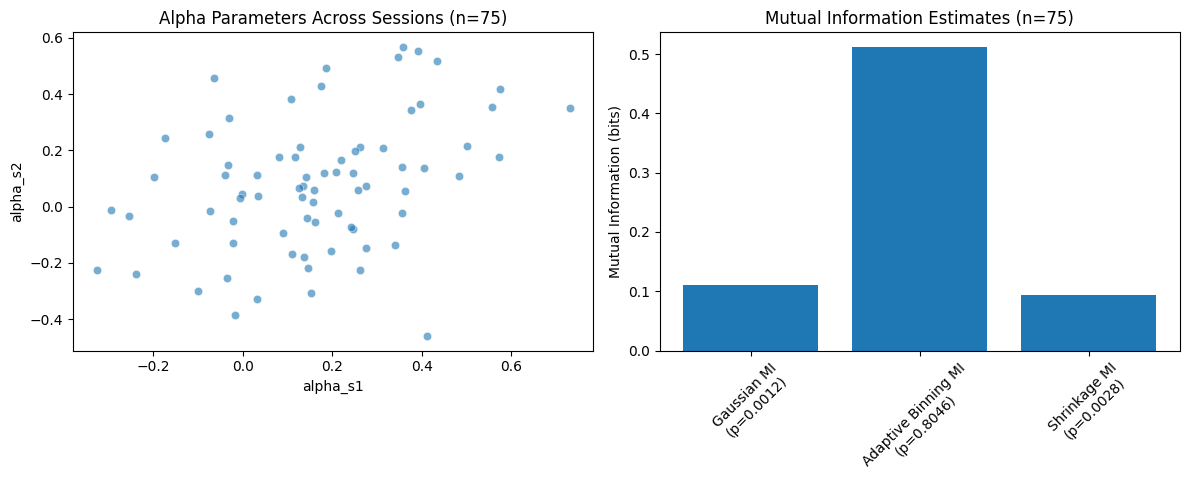


Mutual Information Summary (All Parameters):
Primary Method: shrinkage_mi
Raw MI: 0.0945 bits (p=0.0028)
Conditional MI (all parameters): 0.0943 bits (p=0.0002)
Overall Retention: 99.8%


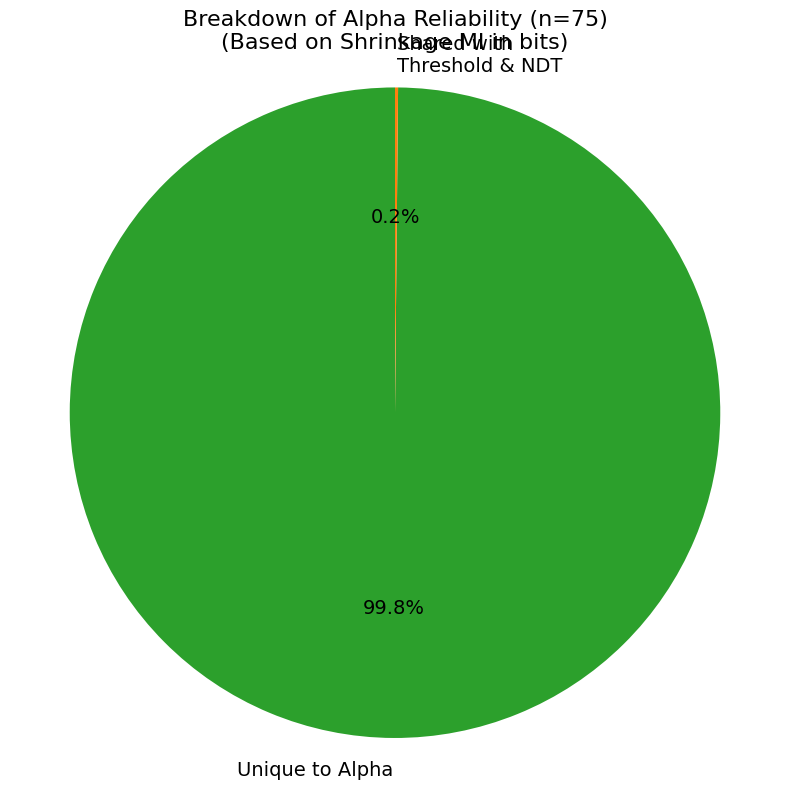

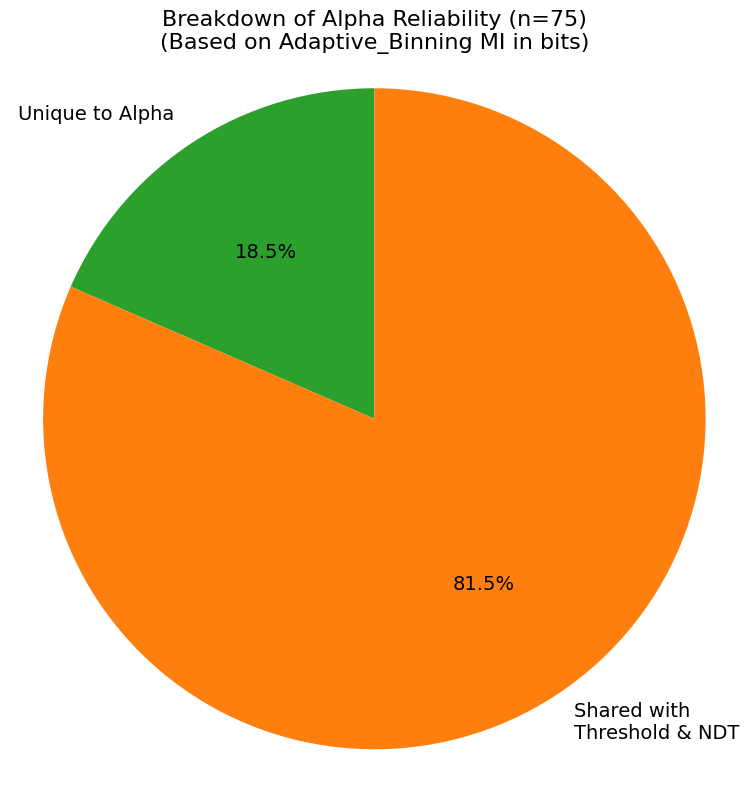

<Figure size 1000x600 with 0 Axes>

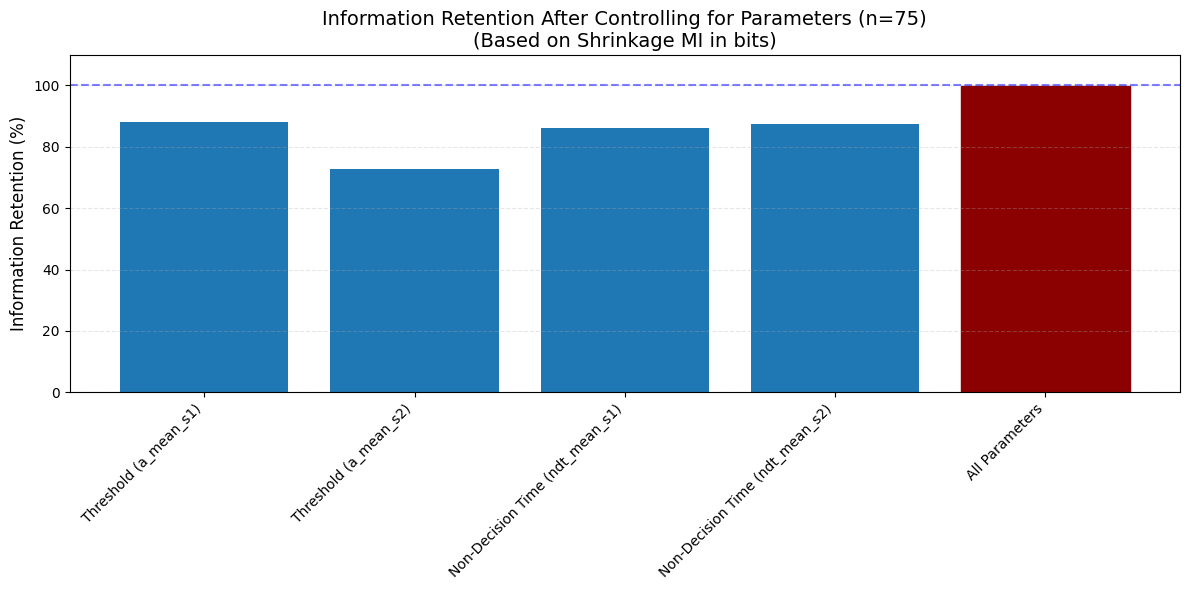

In [ ]:

import NewMI
import numpy as np
import matplotlib.pyplot as plt

# Load your data
session1_path = 'Model2 LDT RMT/EZ_recognition_memory_part1_transformed.csv'  # replace with your actual path
session2_path = 'Model2 LDT RMT/EZ_recognition_memory_part2_transformed.csv'
df_merged = NewMI.load_and_merge(session1_path, session2_path)

# Initialize analyzer
analyzer = NewMI.MutualInformationAnalyzer(df_merged)

# Define control variables
control_vars = ['a_mean_s1', 'a_mean_s2', 'ndt_mean_s1', 'ndt_mean_s2']

# Run analysis
results = analyzer.analyze_alpha_reliability(
    feature='alpha_s1',
    target='alpha_s2',
    control_vars=control_vars,
    primary_method='shrinkage_mi',
    calculate_bootstrap_ci=False
)

# Print results
print("\nRaw Mutual Information Estimates:")
print(f"Gaussian MI: {results['gaussian_mi'][0]:.4f} bits (p={results['gaussian_mi'][1]:.4f})")
print(f"Adaptive Binning MI: {results['adaptive_binning_mi'][0]:.4f} bits (p={results['adaptive_binning_mi'][1]:.4f})")
print(f"Shrinkage MI: {results['shrinkage_mi'][0]:.4f} bits (p={results['shrinkage_mi'][1]:.4f})")

print("\nConditional Mutual Information (controlling for each parameter):")
for var, (cmi, p_value) in results['conditional_mi'].items():
    print(f"{var}: {cmi:.4f} bits (p={p_value:.4f})")
    print(f"Retention: {results['retention'][var]:.1f}%")

# Plot results
analyzer.plot_results(results)


   # Add error bars for bootstrap CIs if available
if 'bootstrap_ci' in results:
    ci_errors = []
    for i, method in enumerate(['gaussian_mi', 'adaptive_binning_mi', 'shrinkage_mi']):
        mi_value = mi_values[i]
        lower_ci, upper_ci = results['bootstrap_ci'][method]
        # Error bar format: [abs(lower_error), abs(upper_error)]
        ci_errors.append([[mi_value - lower_ci], [upper_ci - mi_value]])
    
    # Transpose the error structure for plt.errorbar
    ci_errors = np.array(ci_errors).transpose(2, 0, 1).squeeze()
    
    # Add error bars
    x_positions = range(len(mi_labels))
    plt.errorbar(x_positions, mi_values, yerr=ci_errors, fmt='none', color='black', capsize=5)

/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Available columns in session 1: ['Unnamed: 0', 'Experiment', 'v1_mean', 'v2_mean', 'zr_mean', 'a_mean_s1', 'ndt_mean_s1', 'sndt_mean', 'alpha_mean', 'accuracy_percentage', 'mean_log_rt', 'RT_mean_correct_error', 'mean_correct', 'mean_error', 'error_array', 'RT_Cor_arr', 'ID', 'Task', 'Session', 'alpha_shifted', 'alpha_clipped', 'alpha_arcsin', 'alpha_boxcox_after_arcsin_s1', 'accuracy_arcsin', 'accuracy_percentage_boxcox_after_arcsin']
Available columns in session 2: ['Unnamed: 0', 'Experiment', 'v1_mean', 'v2_mean', 'zr_mean', 'a_mean_s2', 'ndt_mean_s2', 'sndt_mean', 'alpha_mean', 'accuracy_percentage', 'mean_log_rt', 'RT_mean_correct_error', 'mean_correct', 'mean_error', 'error_array', 'RT_Cor_arr', 'ID', 'Task', 'Session', 'alpha_shifted', 'alpha_clipped', 'alpha_arcsin', 'alpha_boxcox_after_arcsin_s2', 'accuracy_arcsin', 'accuracy_percentage_boxcox_after_arcsin']
Using identifier column: ID

Diagnostic Information for Conditional MI (All Parameters):
Number of control variables: 4


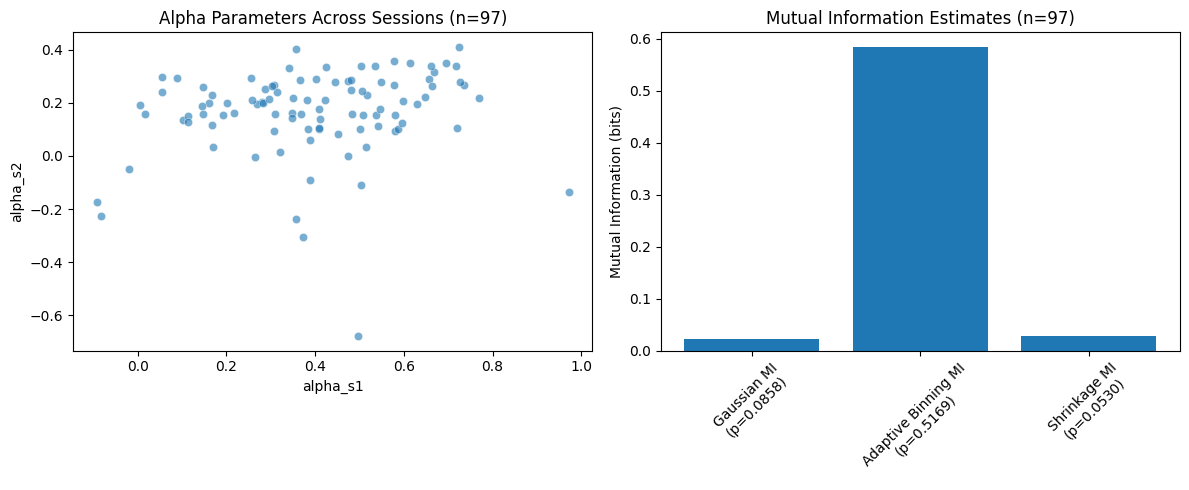


Mutual Information Summary (All Parameters):
Primary Method: shrinkage_mi
Raw MI: 0.0288 bits (p=0.0530)
Conditional MI (all parameters): 0.0535 bits (p=0.0020)
Overall Retention: 185.7%


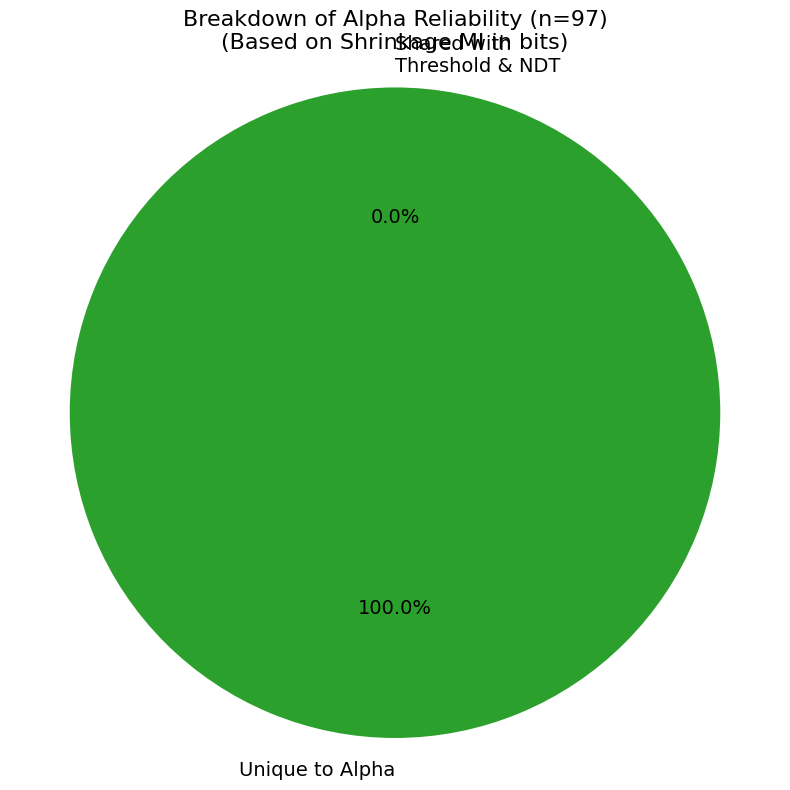

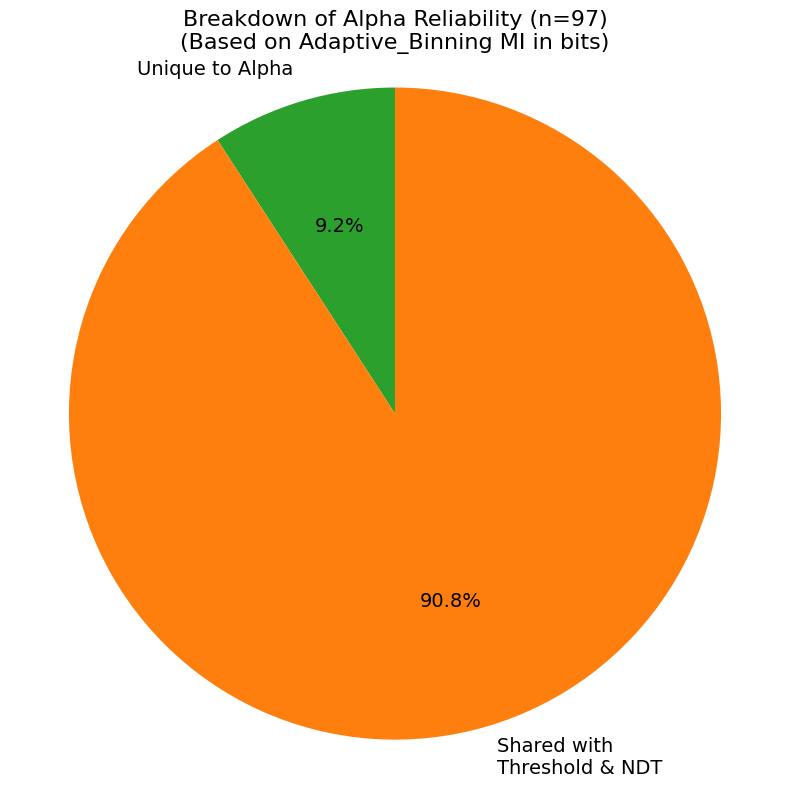

<Figure size 1000x600 with 0 Axes>

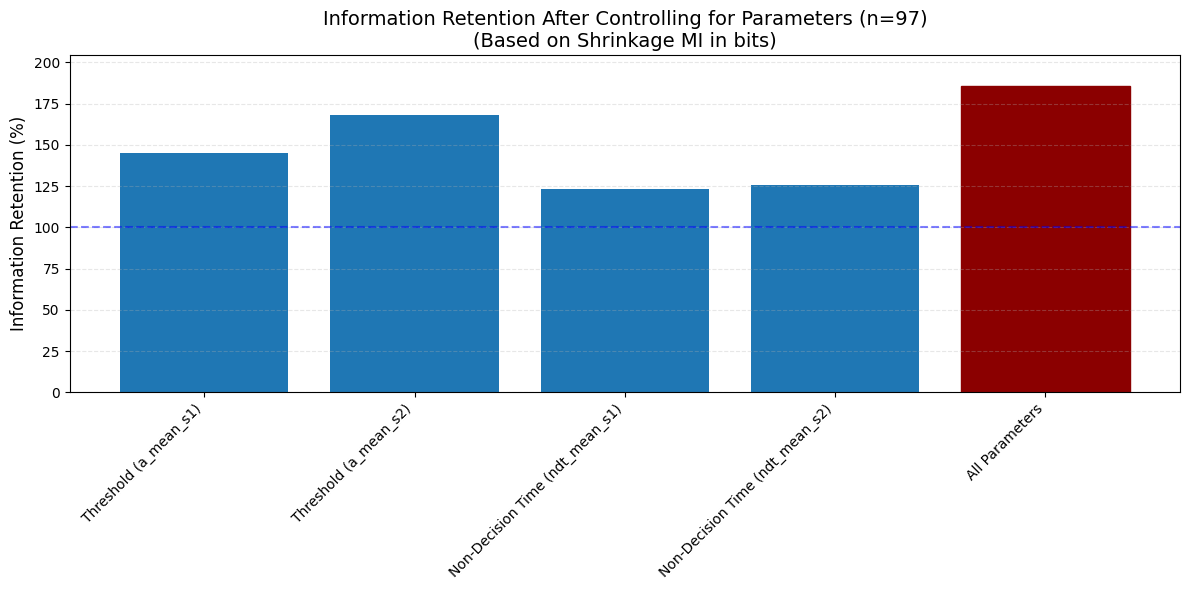

In [1]:

import NewMI

# Load your data
session1_path = 'Model1 LDT RMT/rmt_session_1_data_transformed.csv'  # replace with your actual path
session2_path = 'Model1 LDT RMT/rmt_session_2_data_transformed.csv'
df_merged = NewMI.load_and_merge(session1_path, session2_path)

# Initialize analyzer
analyzer = NewMI.MutualInformationAnalyzer(df_merged)

# Define control variables
control_vars = ['a_mean_s1', 'a_mean_s2', 'ndt_mean_s1', 'ndt_mean_s2']

# Run analysis
results = analyzer.analyze_alpha_reliability(
    feature='alpha_s1',
    target='alpha_s2',
    control_vars=control_vars,
    primary_method='shrinkage_mi',
    calculate_bootstrap_ci=False
)

# Print results
print("\nRaw Mutual Information Estimates:")
print(f"Gaussian MI: {results['gaussian_mi'][0]:.4f} bits (p={results['gaussian_mi'][1]:.4f})")
print(f"Adaptive Binning MI: {results['adaptive_binning_mi'][0]:.4f} bits (p={results['adaptive_binning_mi'][1]:.4f})")
print(f"Shrinkage MI: {results['shrinkage_mi'][0]:.4f} bits (p={results['shrinkage_mi'][1]:.4f})")

print("\nConditional Mutual Information (controlling for each parameter):")
for var, (cmi, p_value) in results['conditional_mi'].items():
    print(f"{var}: {cmi:.4f} bits (p={p_value:.4f})")
    print(f"Retention: {results['retention'][var]:.1f}%")

# Plot results
analyzer.plot_results(results)

   # Add error bars for bootstrap CIs if available
if 'bootstrap_ci' in results:
    ci_errors = []
    for i, method in enumerate(['gaussian_mi', 'adaptive_binning_mi', 'shrinkage_mi']):
        mi_value = mi_values[i]
        lower_ci, upper_ci = results['bootstrap_ci'][method]
        # Error bar format: [abs(lower_error), abs(upper_error)]
        ci_errors.append([[mi_value - lower_ci], [upper_ci - mi_value]])
    
    # Transpose the error structure for plt.errorbar
    ci_errors = np.array(ci_errors).transpose(2, 0, 1).squeeze()
    
    # Add error bars
    x_positions = range(len(mi_labels))
    plt.errorbar(x_positions, mi_values, yerr=ci_errors, fmt='none', color='black', capsize=5)

Available columns in session 1: ['Unnamed: 0', 'Experiment', 'v1_mean', 'v2_mean', 'zr_mean', 'a_mean_s1', 'ndt_mean_s1', 'sndt_mean', 'alpha_mean', 'accuracy_percentage', 'mean_log_rt', 'RT_mean_correct_error', 'mean_correct', 'mean_error', 'error_array', 'RT_Cor_arr', 'ID', 'Task', 'Session', 'alpha_shifted', 'alpha_clipped', 'alpha_arcsin', 'alpha_boxcox_after_arcsin_s1', 'accuracy_arcsin', 'accuracy_percentage_boxcox_after_arcsin']
Available columns in session 2: ['Unnamed: 0', 'Experiment', 'v1_mean', 'v2_mean', 'zr_mean', 'a_mean_s2', 'ndt_mean_s2', 'sndt_mean', 'alpha_mean', 'accuracy_percentage', 'mean_log_rt', 'RT_mean_correct_error', 'mean_correct', 'mean_error', 'error_array', 'RT_Cor_arr', 'ID', 'Task', 'Session', 'alpha_shifted', 'alpha_clipped', 'alpha_arcsin', 'alpha_boxcox_after_arcsin_s2', 'accuracy_arcsin', 'accuracy_percentage_boxcox_after_arcsin']
Using identifier column: ID

Diagnostic Information for Conditional MI (All Parameters):
Number of control variables: 4


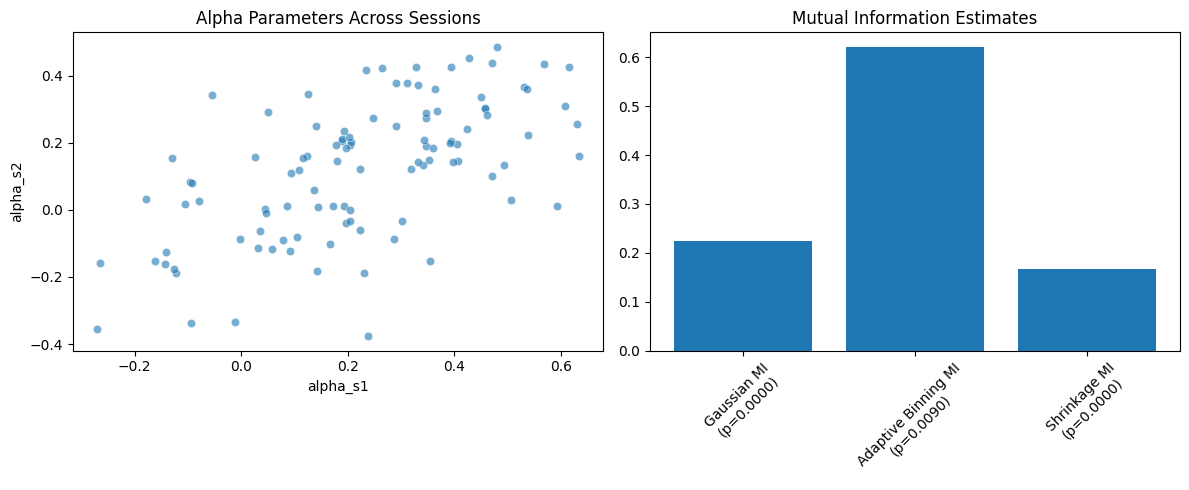


Mutual Information Summary (All Parameters):
Primary Method: shrinkage_mi
Raw MI: 0.1676 bits (p=0.0000)
Conditional MI (all parameters): 0.0854 bits (p=0.0000)
Overall Retention: 51.0%


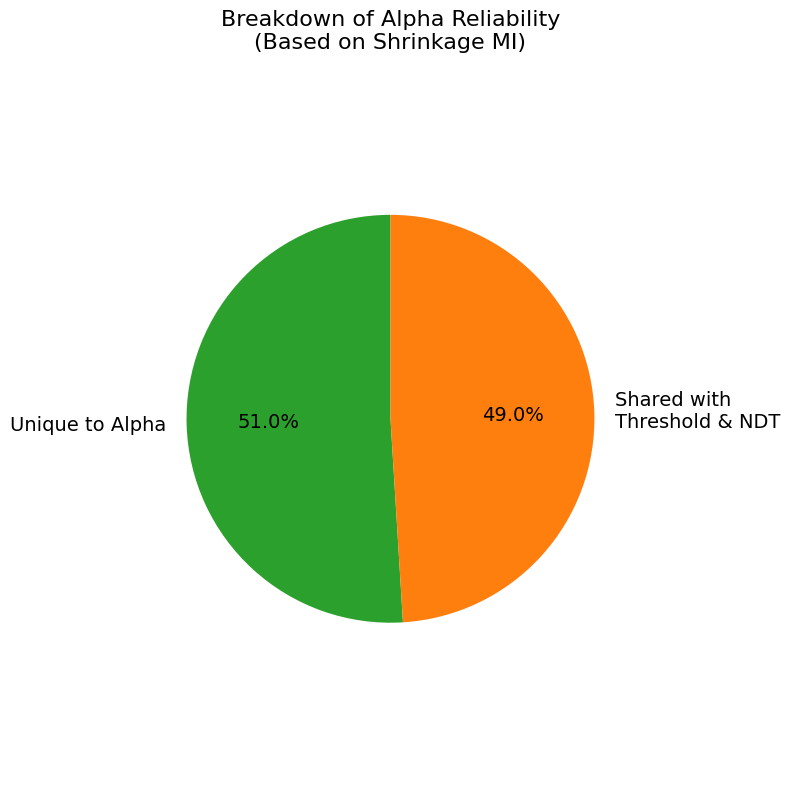

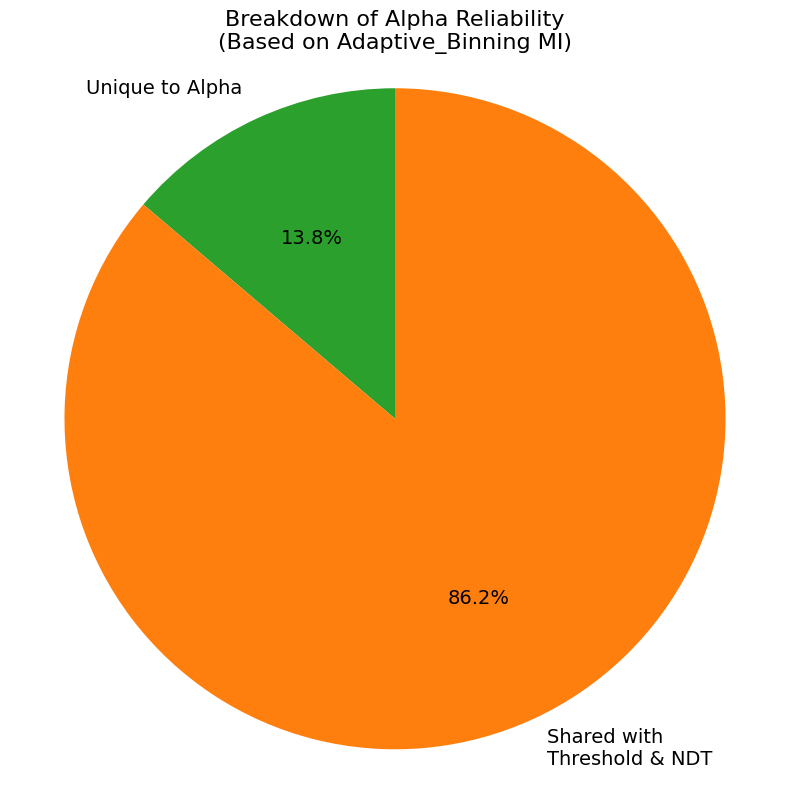

<Figure size 1000x600 with 0 Axes>

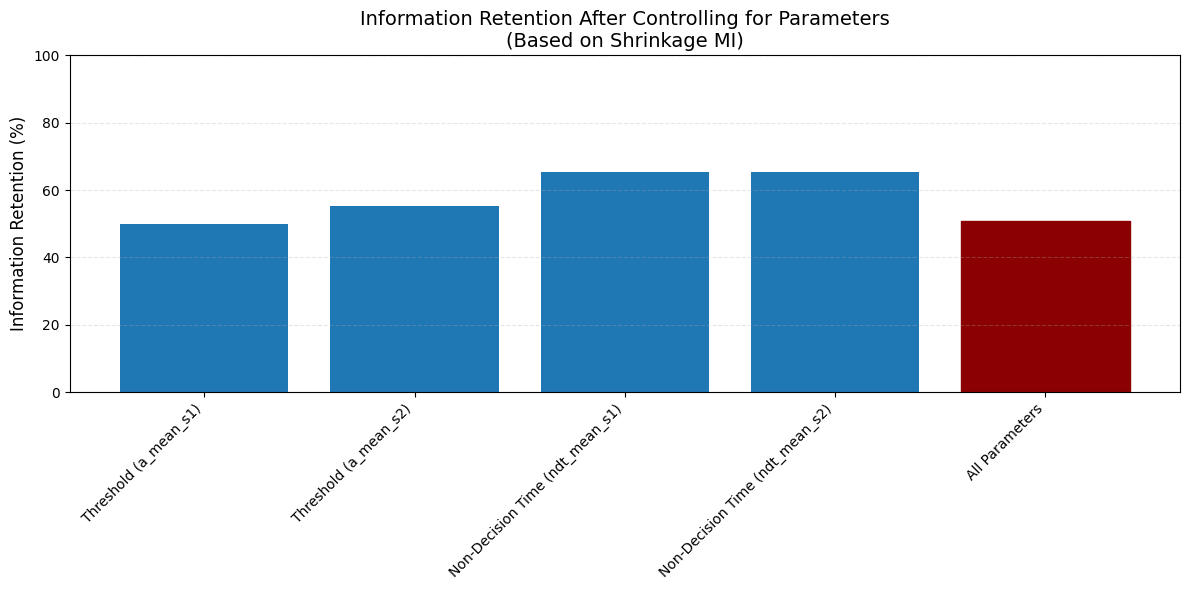

In [7]:
import NewMI

# Load your data
session1_path = 'Model1 LDT RMT/ldt_session_1_data_transformed.csv'  # replace with your actual path
session2_path = 'Model1 LDT RMT/ldt_session_2_data_transformed.csv'
df_merged = NewMI.load_and_merge(session1_path, session2_path)

# Initialize analyzer
analyzer = NewMI.MutualInformationAnalyzer(df_merged)

# Define control variables
control_vars = ['a_mean_s1', 'a_mean_s2', 'ndt_mean_s1', 'ndt_mean_s2']

# Run analysis
results = analyzer.analyze_alpha_reliability(
    feature='alpha_s1',
    target='alpha_s2',
    control_vars=control_vars,
    primary_method='shrinkage_mi',
    calculate_bootstrap_ci=False
)

# Print results
print("\nRaw Mutual Information Estimates:")
print(f"Gaussian MI: {results['gaussian_mi'][0]:.4f} bits (p={results['gaussian_mi'][1]:.4f})")
print(f"Adaptive Binning MI: {results['adaptive_binning_mi'][0]:.4f} bits (p={results['adaptive_binning_mi'][1]:.4f})")
print(f"Shrinkage MI: {results['shrinkage_mi'][0]:.4f} bits (p={results['shrinkage_mi'][1]:.4f})")

print("\nConditional Mutual Information (controlling for each parameter):")
for var, (cmi, p_value) in results['conditional_mi'].items():
    print(f"{var}: {cmi:.4f} bits (p={p_value:.4f})")
    print(f"Retention: {results['retention'][var]:.1f}%")

# Plot results
analyzer.plot_results(results)


if 'bootstrap_ci' in results:
    ci_errors = []
    for i, method in enumerate(['gaussian_mi', 'adaptive_binning_mi', 'shrinkage_mi']):
        mi_value = mi_values[i]
        lower_ci, upper_ci = results['bootstrap_ci'][method]
        # Error bar format: [abs(lower_error), abs(upper_error)]
        ci_errors.append([[mi_value - lower_ci], [upper_ci - mi_value]])
    
    # Transpose the error structure for plt.errorbar
    ci_errors = np.array(ci_errors).transpose(2, 0, 1).squeeze()
    
    # Add error bars
    x_positions = range(len(mi_labels))
    plt.errorbar(x_positions, mi_values, yerr=ci_errors, fmt='none', color='black', capsize=5)

Available columns in session 1: ['Experiment', 'v1_mean', 'v2_mean', 'a_mean_s1', 'ndt_mean_s1', 'alpha_mean', 'accuracy_percentage', 'mean_log_rt', 'RT_mean_correct_error', 'mean_correct', 'mean_Crror', 'error_array', 'RT_Cor_arr', 'q1_C', 'q2_C', 'q3_C', 'q4_C', 'q1_E', 'q2_E', 'q3_E', 'q4_E', 'participant_ID', 'alpha_mean_shifted', 'alpha_mean_arcsin', 'alpha_boxcox_after_arcsin_s1', 'accuracy_percentage_arcsin', 'accuracy_percentage_boxcox_after_arcsin']
Available columns in session 2: ['Experiment', 'v1_mean', 'v2_mean', 'a_mean_s2', 'ndt_mean_s2', 'alpha_mean', 'accuracy_percentage', 'mean_log_rt', 'RT_mean_correct_error', 'mean_correct', 'mean_Crror', 'error_array', 'RT_Cor_arr', 'q1_C', 'q2_C', 'q3_C', 'q4_C', 'q1_E', 'q2_E', 'q3_E', 'q4_E', 'participant_ID', 'alpha_mean_shifted', 'alpha_mean_arcsin', 'alpha_boxcox_after_arcsin_s2', 'accuracy_percentage_arcsin', 'accuracy_percentage_boxcox_after_arcsin']
Using identifier column: participant_ID

Diagnostic Information for Condit

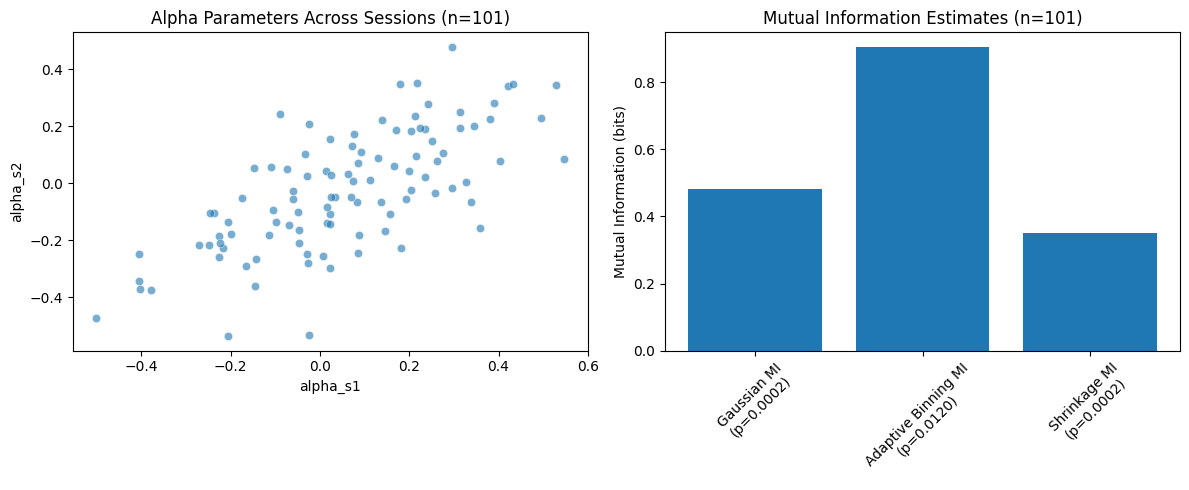


Mutual Information Summary (All Parameters):
Primary Method: shrinkage_mi
Raw MI: 0.3516 bits (p=0.0002)
Conditional MI (all parameters): 0.1624 bits (p=0.0002)
Overall Retention: 46.2%


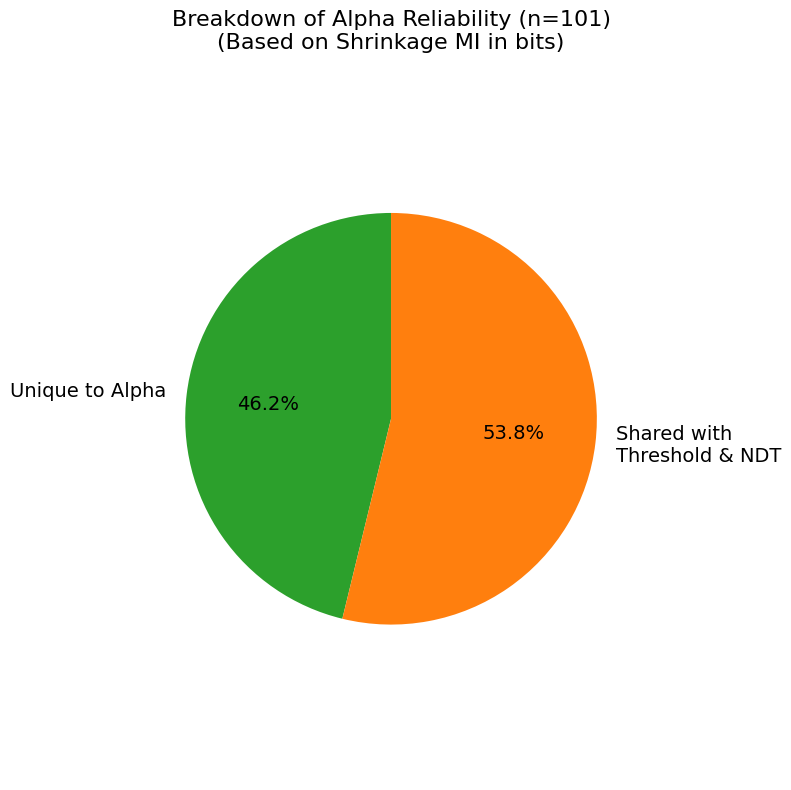

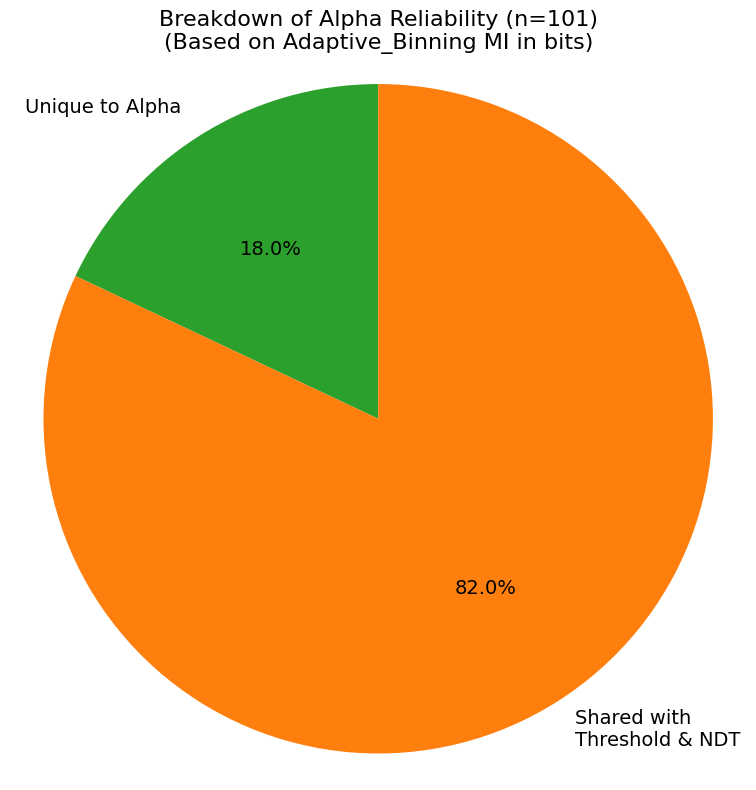

<Figure size 1000x600 with 0 Axes>

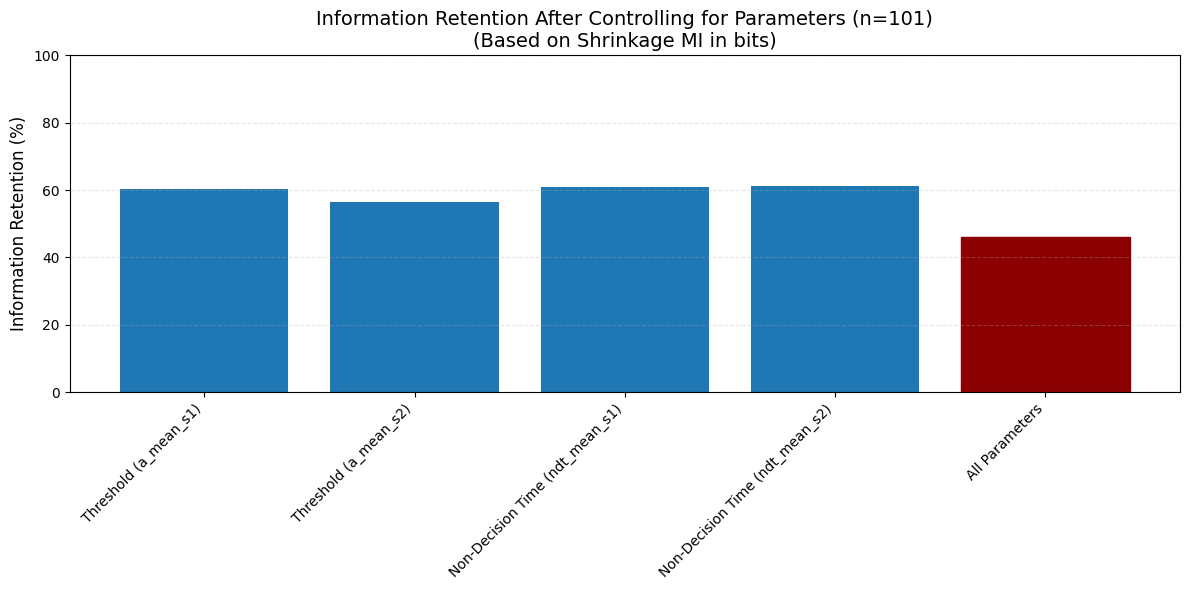

In [2]:
import NewMI

# Load your data
session1_path = 'Model2 LDT RMT/EZ_lexical_decision_part1_transformed.csv'  # replace with your actual path
session2_path = 'Model2 LDT RMT/EZ_lexical_decision_part2_transformed.csv'
df_merged = NewMI.load_and_merge(session1_path, session2_path)

# Initialize analyzer
analyzer = NewMI.MutualInformationAnalyzer(df_merged)

# Define control variables
control_vars = ['a_mean_s1', 'a_mean_s2', 'ndt_mean_s1', 'ndt_mean_s2']

# Run analysis
results = analyzer.analyze_alpha_reliability(
    feature='alpha_s1',
    target='alpha_s2',
    control_vars=control_vars,
    primary_method='shrinkage_mi',
    calculate_bootstrap_ci=False  # Use this method for calculations
)

# Print results
print("\nRaw Mutual Information Estimates:")
print(f"Gaussian MI: {results['gaussian_mi'][0]:.4f} bits (p={results['gaussian_mi'][1]:.4f})")
print(f"Adaptive Binning MI: {results['adaptive_binning_mi'][0]:.4f} bits (p={results['adaptive_binning_mi'][1]:.4f})")
print(f"Shrinkage MI: {results['shrinkage_mi'][0]:.4f} bits (p={results['shrinkage_mi'][1]:.4f})")

print("\nConditional Mutual Information (controlling for each parameter):")
for var, (cmi, p_value) in results['conditional_mi'].items():
    print(f"{var}: {cmi:.4f} bits (p={p_value:.4f})")
    print(f"Retention: {results['retention'][var]:.1f}%")

# Plot results
analyzer.plot_results(results)

Available columns in session 1: ['Unnamed: 0', 'participant', 'v1', 'v2', 'zr', 'a_mean_s1', 'ndt_mean_s1', 'sndt', 'alpha', 'accuracy_percentage', 'mean_log_rt', 'RT_mean_correct_error', 'mean_correct', 'mean_Crror', 'log_alpha_mean', 'alpha_capped', 'alpha_shifted', 'alpha_arcsin', 'alpha_arcsin_positive', 'alpha_boxcox_after_arcsin_s1', 'accuracy_arcsin', 'accuracy_arcsin_positive', 'accuracy_boxcox_after_arcsin']
Available columns in session 2: ['Unnamed: 0', 'participant', 'v1', 'v2', 'zr', 'a_mean_s2', 'ndt_mean_s2', 'sndt', 'alpha', 'accuracy_percentage', 'mean_log_rt', 'RT_mean_correct_error', 'mean_correct', 'mean_Crror', 'log_alpha_mean', 'alpha_capped', 'alpha_shifted', 'alpha_arcsin', 'alpha_arcsin_positive', 'alpha_boxcox_after_arcsin_s2', 'accuracy_arcsin', 'accuracy_arcsin_positive', 'accuracy_boxcox_after_arcsin']
Using identifier column: participant

Diagnostic Information for Conditional MI (All Parameters):
Number of control variables: 4
Control variables: ['a_mean_s

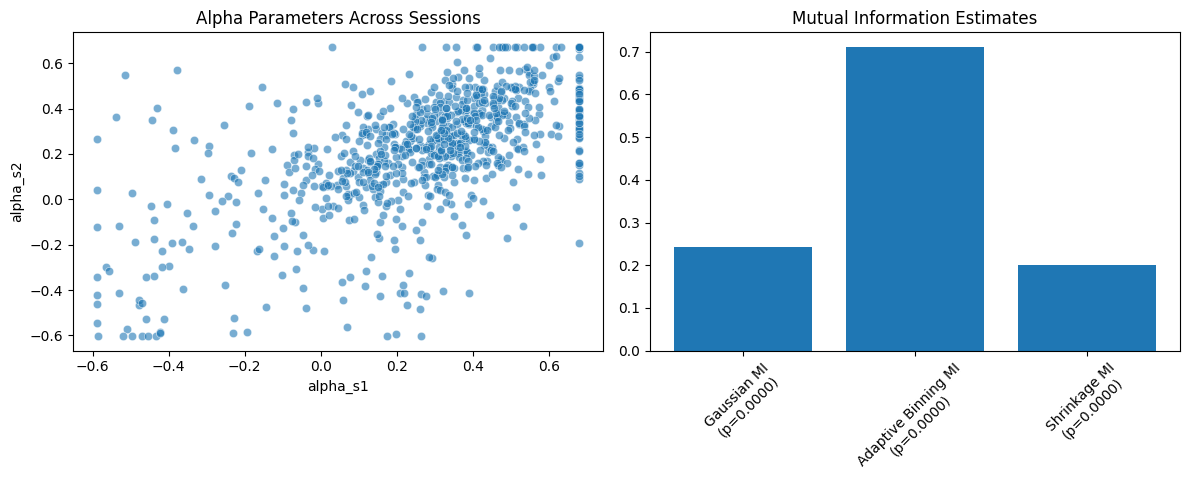


Mutual Information Summary (All Parameters):
Primary Method: shrinkage_mi
Raw MI: 0.2013 bits (p=0.0000)
Conditional MI (all parameters): 0.1051 bits (p=0.0000)
Overall Retention: 52.2%


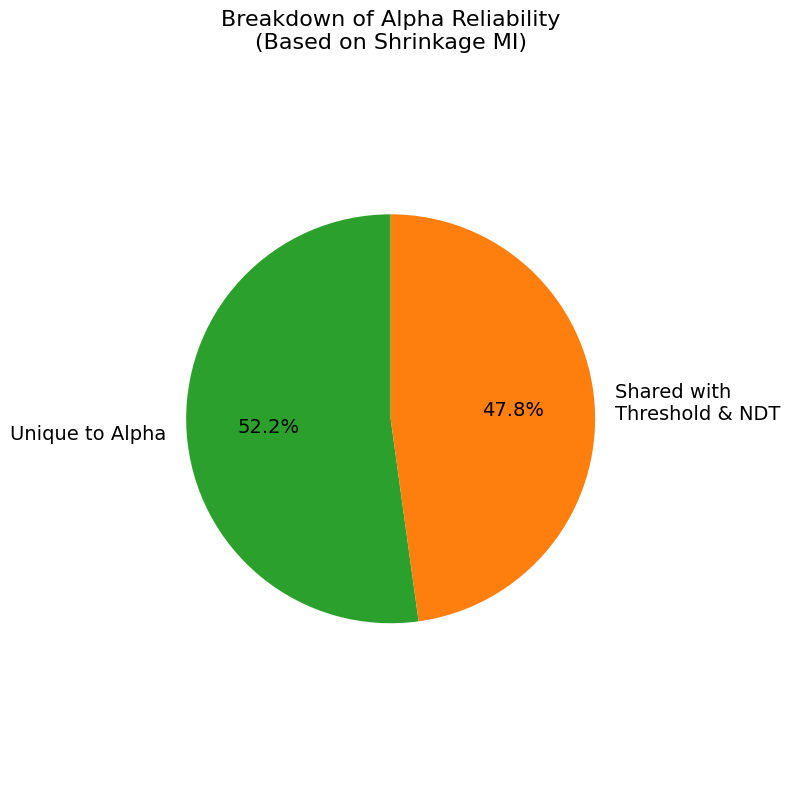

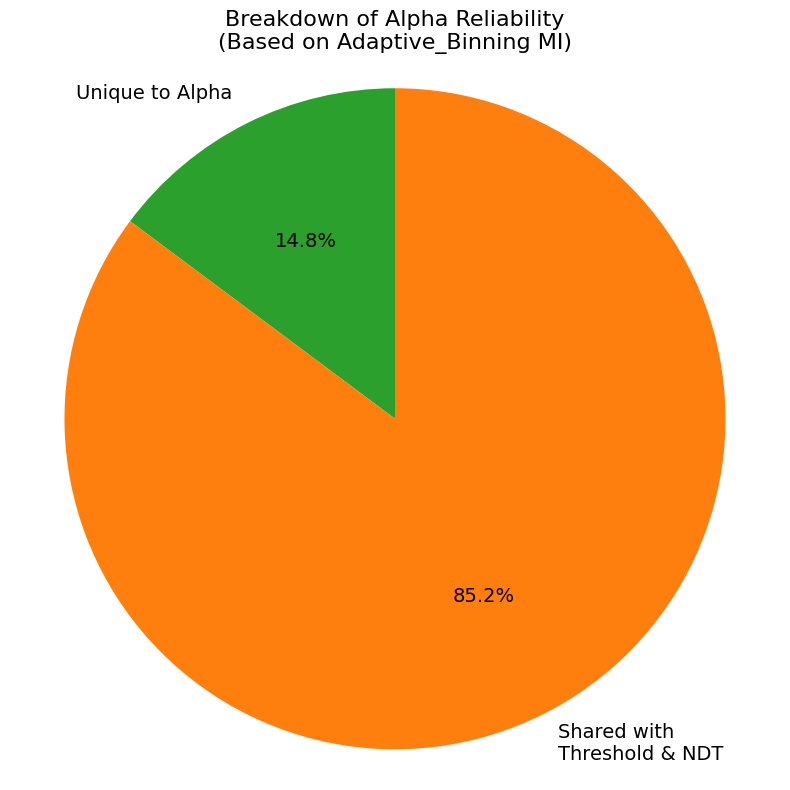

<Figure size 1000x600 with 0 Axes>

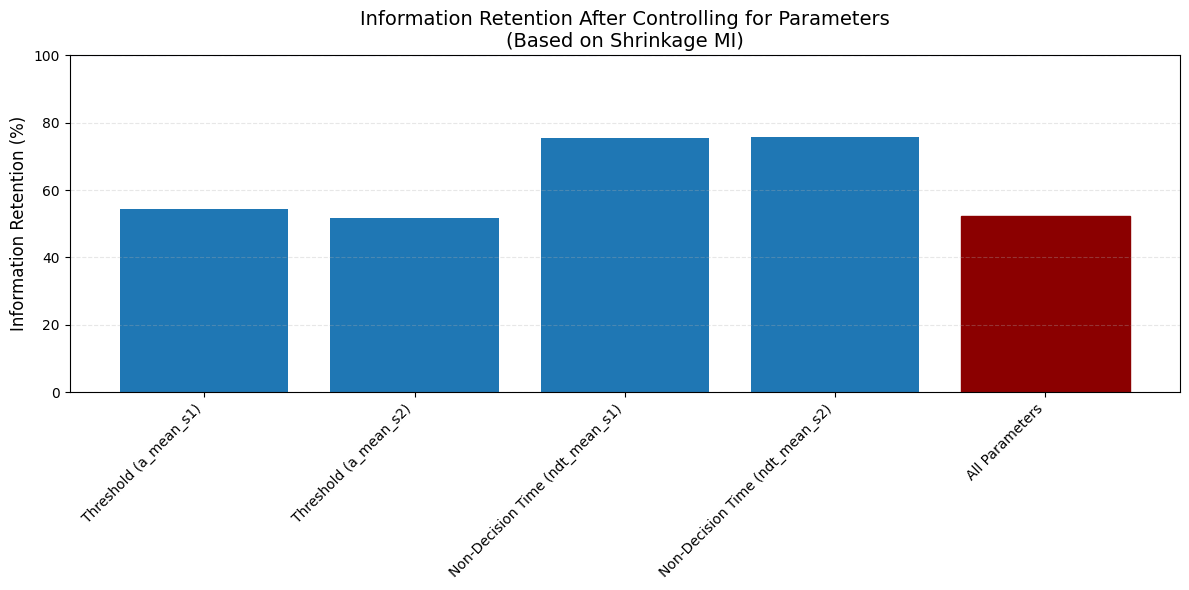

In [8]:
import NewMI

# Load your data
session1_path = 'Model1 ELP/Transformed_recoverd_param_ELP_S1_second_100_2000_200_epoch_rt_acc_logAlphaSample.csv'
session2_path = 'Model1 ELP/Transformed_recoverd_param_ELP_S2_second_100_2000_200_epoch_rt_acc_logAlphaSample.csv'

df_merged = NewMI.load_and_merge(session1_path, session2_path)

# Initialize analyzer
analyzer = NewMI.MutualInformationAnalyzer(df_merged)

# Define control variables
control_vars = ['a_mean_s1', 'a_mean_s2', 'ndt_mean_s1', 'ndt_mean_s2']

# Run analysis
results = analyzer.analyze_alpha_reliability(
    feature='alpha_s1',
    target='alpha_s2',
    control_vars=control_vars,
    primary_method='shrinkage_mi',
    calculate_bootstrap_ci=False  # Use this method for calculations
)

# Print results
print("\nRaw Mutual Information Estimates:")
print(f"Gaussian MI: {results['gaussian_mi'][0]:.4f} bits (p={results['gaussian_mi'][1]:.4f})")
print(f"Adaptive Binning MI: {results['adaptive_binning_mi'][0]:.4f} bits (p={results['adaptive_binning_mi'][1]:.4f})")
print(f"Shrinkage MI: {results['shrinkage_mi'][0]:.4f} bits (p={results['shrinkage_mi'][1]:.4f})")

print("\nConditional Mutual Information (controlling for each parameter):")
for var, (cmi, p_value) in results['conditional_mi'].items():
    print(f"{var}: {cmi:.4f} bits (p={p_value:.4f})")
    print(f"Retention: {results['retention'][var]:.1f}%")

# Plot results
analyzer.plot_results(results)

# ELP Model 2

/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Available columns in session 1: ['Unnamed: 0', 'participant', 'v1', 'v2', 'a_mean_s1', 'ndt_mean_s1', 'alpha', 'accuracy_percentage', 'mean_log_rt', 'RT_mean_correct_error', 'mean_correct', 'mean_Crror', 'log_alpha_mean', 'alpha_capped', 'alpha_shifted', 'alpha_arcsin', 'alpha_arcsin_positive', 'alpha_boxcox_after_arcsin_s1', 'accuracy_arcsin', 'accuracy_arcsin_positive', 'accuracy_boxcox_after_arcsin']
Available columns in session 2: ['Unnamed: 0', 'participant', 'v1', 'v2', 'a_mean_s2', 'ndt_mean_s2', 'alpha', 'accuracy_percentage', 'mean_log_rt', 'RT_mean_correct_error', 'mean_correct', 'mean_Crror', 'log_alpha_mean', 'alpha_capped', 'alpha_shifted', 'alpha_arcsin', 'alpha_arcsin_positive', 'alpha_boxcox_after_arcsin_s2', 'accuracy_arcsin', 'accuracy_arcsin_positive', 'accuracy_boxcox_after_arcsin']
Using identifier column: participant

Diagnostic Information for Conditional MI (All Parameters):
Number of control variables: 4
Control variables: ['a_mean_s1', 'a_mean_s2', 'ndt_mean_s

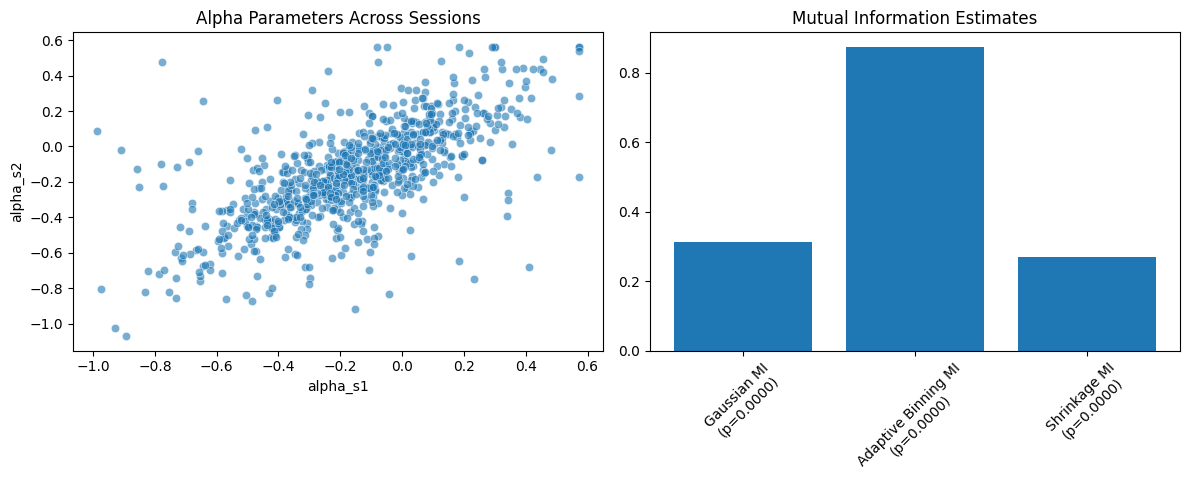


Mutual Information Summary (All Parameters):
Primary Method: shrinkage_mi
Raw MI: 0.2692 bits (p=0.0000)
Conditional MI (all parameters): 0.1328 bits (p=0.0000)
Overall Retention: 49.3%


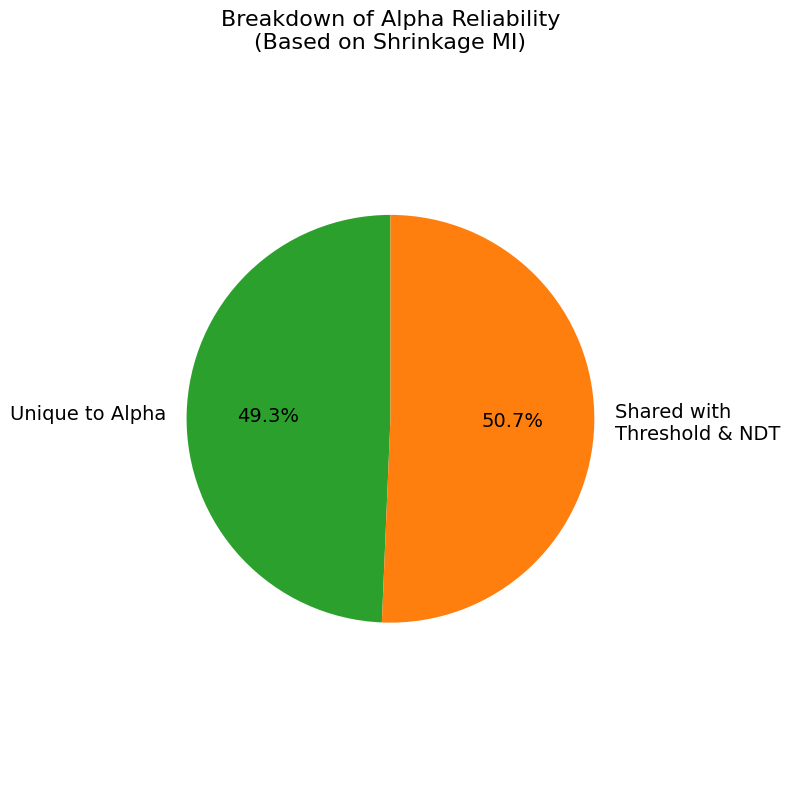

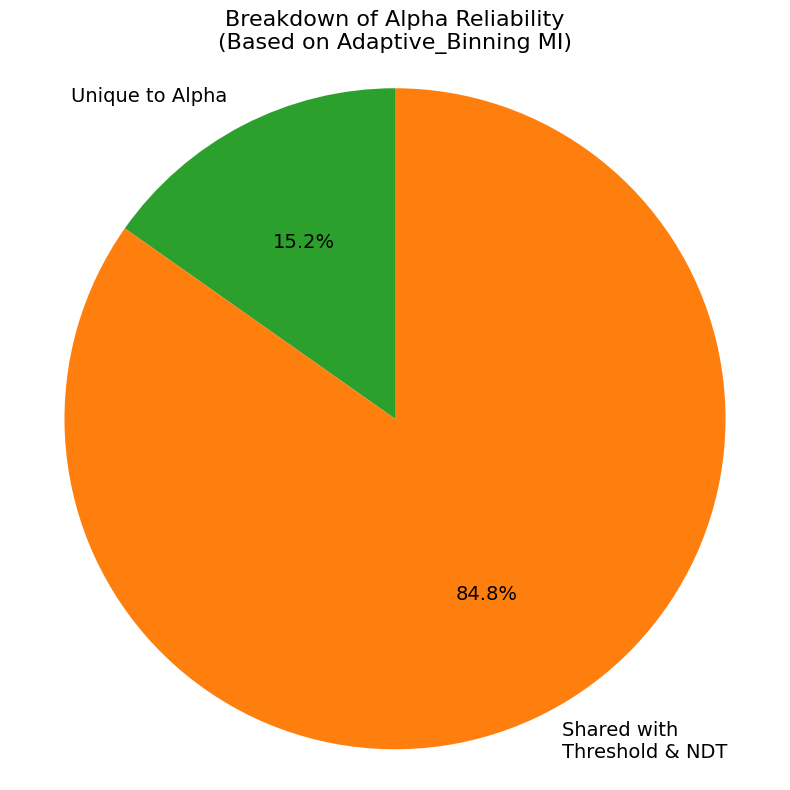

<Figure size 1000x600 with 0 Axes>

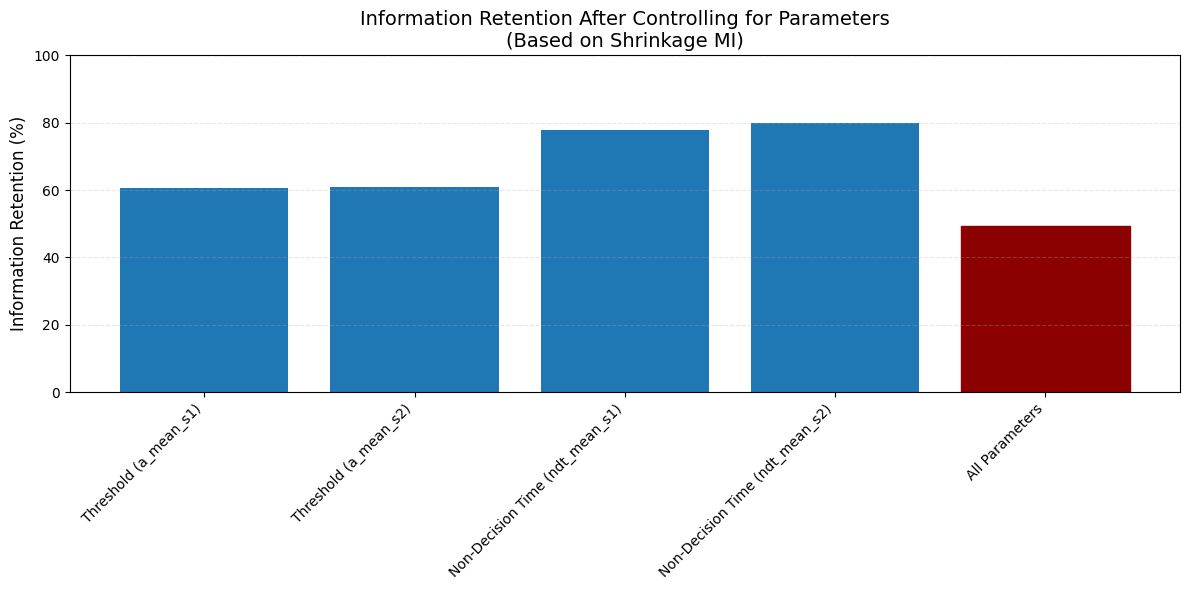

In [1]:
import NewMI

# Load your data
session1_path = 'Model2 ELP/Transformed_recoverd_param_ELP_S1_second_100_2000_200_epoch_rt_acc_logAlphaSample.csv'
session2_path = 'Model2 ELP/Transformed_recoverd_param_ELP_S2_second_100_2000_200_epoch_rt_acc_logAlphaSample.csv'

df_merged = NewMI.load_and_merge(session1_path, session2_path)

# Initialize analyzer
analyzer = NewMI.MutualInformationAnalyzer(df_merged)

# Define control variables
control_vars = ['a_mean_s1', 'a_mean_s2', 'ndt_mean_s1', 'ndt_mean_s2']

# Run analysis
results = analyzer.analyze_alpha_reliability(
    feature='alpha_s1',
    target='alpha_s2',
    control_vars=control_vars,
    primary_method='shrinkage_mi',
    calculate_bootstrap_ci=False  # Use this method for calculations
)

# Print results
print("\nRaw Mutual Information Estimates:")
print(f"Gaussian MI: {results['gaussian_mi'][0]:.4f} bits (p={results['gaussian_mi'][1]:.4f})")
print(f"Adaptive Binning MI: {results['adaptive_binning_mi'][0]:.4f} bits (p={results['adaptive_binning_mi'][1]:.4f})")
print(f"Shrinkage MI: {results['shrinkage_mi'][0]:.4f} bits (p={results['shrinkage_mi'][1]:.4f})")

print("\nConditional Mutual Information (controlling for each parameter):")
for var, (cmi, p_value) in results['conditional_mi'].items():
    print(f"{var}: {cmi:.4f} bits (p={p_value:.4f})")
    print(f"Retention: {results['retention'][var]:.1f}%")

# Plot results
analyzer.plot_results(results)